In [2]:
import csv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
# Ruta de la carpeta que contiene los archivos CSV
data_folder = 'Data/'


In [45]:
# Leer el archivo Excel
df_excel = pd.read_excel("Data/consumohdna_202408.xlsx")

#convertimos en conjunto de datos y guardamos en la carpeta Data
df_excel.to_csv("Data/consumohdna_202408.csv", index=False)

In [6]:
# Obtener la lista de archivos CSV en la carpeta
csv_files = [os.path.join(data_folder, file) for file in os.listdir(data_folder) if file.endswith('.csv')]
csv_files = sorted(csv_files)  # Ordenar la lista de archivos

for file in csv_files:
    print(file)

Data/consumohdna_202211.csv
Data/consumohdna_202212.csv
Data/consumohdna_202301.csv
Data/consumohdna_202302.csv
Data/consumohdna_202303.csv
Data/consumohdna_202304.csv
Data/consumohdna_202305.csv
Data/consumohdna_202306.csv
Data/consumohdna_202307.csv
Data/consumohdna_202308.csv
Data/consumohdna_202309.csv
Data/consumohdna_202310.csv
Data/consumohdna_202311.csv
Data/consumohdna_202312.csv
Data/consumohdna_202401.csv
Data/consumohdna_202402.csv
Data/consumohdna_202403.csv
Data/consumohdna_202404.csv
Data/consumohdna_202405.csv
Data/consumohdna_202406.csv
Data/consumohdna_202407.csv
Data/consumohdna_202408.csv
Data/consumohdna_202409.csv
Data/consumohdna_202410.csv
Data/consumohdna_202411.csv
Data/consumohdna_202412.csv
Data/consumohdna_202501.csv
Data/consumohdna_202502.csv
Data/consumohdna_202503.csv
Data/consumohdna_202504.csv


In [18]:
df_corregir1 = pd.read_csv("Data/consumohdna_202211.csv", encoding='latin-1', sep=';', dtype=str)

df_corregir1["PERIODO"] = '202211'

df_corregir1.head()

df_corregir1.to_csv("Data/consumohdna_202211.csv", index=False)

In [21]:
# Función para leer un archivo CSV con la codificación y delimitador detectados
def read_csv_with_detected_encoding_and_delimiter(file_path):
    encodings = ['utf-8-sig','latin-1', 'utf-8']
    delimiters = [';',',']
    
    for encoding in encodings:
        print("\n")
        print(f"Intentando leer el archivo {file_path} con codificación: {encoding}")
        for delimiter in delimiters:
            try:
                df = pd.read_csv(file_path, encoding=encoding, sep=delimiter, dtype=str)
                print(f"Archivo leído correctamente con codificación: {encoding} y delimitador: {delimiter}")
                return df
            except Exception as e:
                print(f"Error al leer el archivo con codificación: {encoding} y delimitador: {delimiter}. Error: {e}")
                continue
    raise Exception(f"No se pudo leer el archivo {file_path} con ninguna de las combinaciones de codificación y delimitador probadas.")


In [22]:
# Leer todos los archivos CSV con la codificación y delimitador detectados

output_file = 'data_consumo_unificado.csv'

# Escribe encabezado solo una vez
primero = True

for file in csv_files:
    df_temp = read_csv_with_detected_encoding_and_delimiter(file)

    # Mantener solo las columnas necesarias
    columnas_deseadas = ['PERIODO', 'UNIDAD_NEGOCIO','DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
'IMPORTE', 'CONSUMO']
    print(df_temp['PERIODO'].head( ))
    df_temp = df_temp[columnas_deseadas]

    # Guardar en el archivo destino por partes
    df_temp.to_csv(output_file, mode='a', header=primero, index=False)
    primero = False  # solo el primero tiene encabezado



Intentando leer el archivo Data/consumohdna_202211.csv con codificación: utf-8-sig
Error al leer el archivo con codificación: utf-8-sig y delimitador: ;. Error: Error tokenizing data. C error: Expected 1 fields in line 76099, saw 2

Archivo leído correctamente con codificación: utf-8-sig y delimitador: ,
0    202211
1    202211
2    202211
3    202211
4    202211
Name: PERIODO, dtype: object


Intentando leer el archivo Data/consumohdna_202212.csv con codificación: utf-8-sig
Error al leer el archivo con codificación: utf-8-sig y delimitador: ;. Error: 'utf-8' codec can't decode byte 0xbf in position 171796: invalid start byte
Error al leer el archivo con codificación: utf-8-sig y delimitador: ,. Error: Error tokenizing data. C error: Expected 1 fields in line 14993, saw 2



Intentando leer el archivo Data/consumohdna_202212.csv con codificación: latin-1
Archivo leído correctamente con codificación: latin-1 y delimitador: ;
0    202212
1    202212
2    202212
3    202212
4    202212


In [23]:
df = pd.read_csv('data_consumo_unificado.csv')

# Filtrar
df_ancash = df[df['DEPARTAMENTO'] == 'Ancash']

# Guardar
df_ancash.to_csv('data_consumo_ancash.csv', index=False)

In [3]:
# Cargar el archivo unificado
df = pd.read_csv('data_consumo_ancash.csv')

# Asegurarte que PERIODO esté como string o entero limpio
df['PERIODO'] = df['PERIODO'].astype(str).str[:6]

# Agrupar por PERIODO y calcular los valores pedidos
resumen_periodo_ancash = df.groupby('PERIODO').agg(
    CONSUMO_PROMEDIO=('CONSUMO', 'mean'),
    IMPORTE_PROMEDIO=('IMPORTE', 'mean'),
    REGISTROS=('CONSUMO', 'count')  # o 'size'
).reset_index()

# Visualizar
print(resumen_periodo_ancash)

   PERIODO  CONSUMO_PROMEDIO  IMPORTE_PROMEDIO  REGISTROS
0   202211        116.899656        109.366671     298054
1   202212        119.164769        115.981192     300171
2   202301        119.557422        117.032719     302425
3   202302        114.899524        107.978522     303837
4   202303        124.851122        114.339044     305229
5   202304        123.515812        112.516727     305997
6   202305        119.725799        110.118921     306027
7   202306        113.138890        103.654176     307934
8   202307        115.276944        103.496909     309218
9   202308        115.571111        102.382484     309957
10  202309        111.708698         97.885057     310748
11  202310        117.123712        102.155046     311584
12  202311        113.945306         98.348642     312296
13  202312        119.147470        105.176661     313566
14  202401        123.905629        106.616342     313970
15  202402        119.630774        104.037319     314226
16  202403    

In [4]:
# Usamos el resumen del paso anterior
df_ts = resumen_periodo_ancash.copy()

# Convertir PERIODO a fecha (formato año-mes)
df_ts['FECHA'] = pd.to_datetime(df_ts['PERIODO'], format='%Y%m')
df_ts.set_index('FECHA', inplace=True)

# Asegurar orden cronológico
df_ts.sort_index(inplace=True)

# Seleccionar solo la variable objetivo
serie = df_ts['CONSUMO_PROMEDIO']

# Visualizar
print(serie.head())

FECHA
2022-11-01    116.899656
2022-12-01    119.164769
2023-01-01    119.557422
2023-02-01    114.899524
2023-03-01    124.851122
Name: CONSUMO_PROMEDIO, dtype: float64


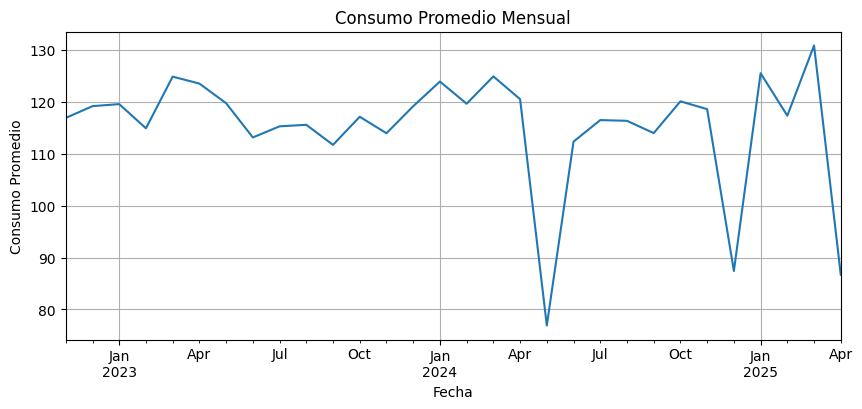

In [5]:
import matplotlib.pyplot as plt

serie.plot(figsize=(10, 4), title='Consumo Promedio Mensual')
plt.xlabel("Fecha")
plt.ylabel("Consumo Promedio")
plt.grid()
plt.show()

In [8]:
!pip install pmdarima

In [22]:
!pip uninstall pmdarima -y
!pip install --no-binary :all: pmdarima

Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4


You can safely remove it manually.


     ---------------------------------------- 0.0/630.3 kB ? eta -:--:--
     -------------------------------------- 630.3/630.3 kB 7.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [100 lines of output]
      Ignoring numpy: markers 'python_version < "3.10"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.10" and platform_system != "Windows"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.10" and platform_system == "Windows"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.12"' don't match your environment
      Ignoring scipy: markers 'python_version <= "3.8" and platform_machine != "aarch64"' don't match your environment
      Ignoring scipy: markers 'python_version <= "3.8" and platform_machine == "aarch64"' don't match your environment
      Ignoring scipy: markers 'python_version == "3.9"' don't match your environment
      Ignoring scipy: markers 'python_version == "3.10"' don't match your environment
      Ignoring scipy:

In [23]:
import pmdarima as pm

# Usar auto_arima para seleccionar el mejor modelo (usamos MS: Month Start)
modelo_auto = pm.auto_arima(
    serie,
    seasonal=True,
    m=12,  # estacionalidad mensual
    d=None,
    D=None,
    stepwise=True,
    suppress_warnings=True,
    trace=True
)

print(modelo_auto.summary())

ModuleNotFoundError: No module named 'pmdarima'

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Parámetros iniciales (pueden ajustarse luego con grid search)
# (p,d,q) x (P,D,Q,s)
# p: autoregresivo, d: diferencia, q: promedio móvil
# s = 12 para estacionalidad anual

modelo = SARIMAX(
    serie,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

resultado = modelo.fit(disp=False)

# Mostrar resumen
print(resultado.summary())

f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                   CONSUMO_PROMEDIO   No. Observations:                   30
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -11.331
Date:                            Wed, 25 Jun 2025   AIC                             32.663
Time:                                    03:31:24   BIC                             28.156
Sample:                                11-01-2022   HQIC                            23.603
                                     - 04-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6318   1.34e+04  -4.72e-05      1.000   -2.62e+04    2.62e+04
ma.L1         -1.0000   8315.708   

f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3160: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3160: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


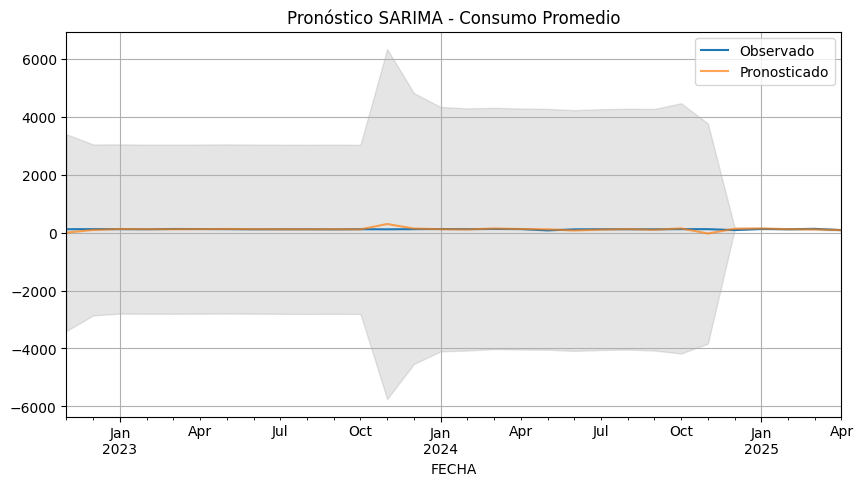

In [30]:
# Predicción dentro de la muestra (in-sample)
pred = resultado.get_prediction(start=0, end=len(serie)-1)
pred_ci = pred.conf_int()

# Plot
ax = serie.plot(label='Observado', figsize=(10, 5))
pred.predicted_mean.plot(ax=ax, label='Pronosticado', alpha=0.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.legend()
plt.title("Pronóstico SARIMA - Consumo Promedio")
plt.grid()
plt.show()

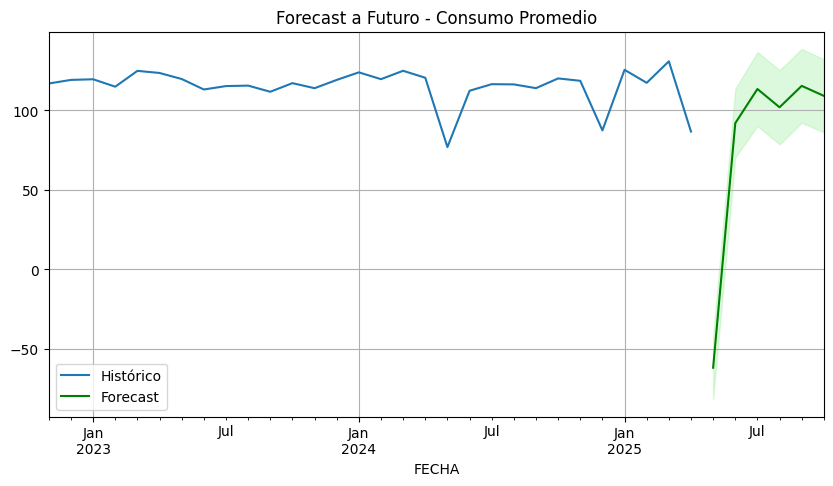

2025-05-01    -61.812928
2025-06-01     91.961076
2025-07-01    113.433846
2025-08-01    101.943913
2025-09-01    115.405274
2025-10-01    109.146633
Freq: MS, Name: predicted_mean, dtype: float64


: 

In [ ]:
# Forecast para 6 meses
forecast = resultado.get_forecast(steps=6)
forecast_ci = forecast.conf_int()

# Graficar
ax = serie.plot(label='Histórico', figsize=(10, 5))
forecast.predicted_mean.plot(ax=ax, label='Forecast', color='green')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='lightgreen', alpha=0.3)
plt.legend()
plt.title("Forecast a Futuro - Consumo Promedio")
plt.grid()
plt.show()

# Mostrar valores
print(forecast.predicted_mean)
